In [3]:
import numpy as np
from qutip import *

from qutip.qip.circuit import QubitCircuit, Gate
from qutip.qip.operations import gate_sequence_product, rx
from qutip.qip.device import *
from qutip.qip import pulse

#print(qutip.qip.device.__file__)

#import qip.ethprocessor as qip
%load_ext autoreload
%autoreload 2

# One qubit test

## Quantum Circuit

In [10]:
# Number of qubits in the system
N = 1

# Input state
input_states = ["0"]*N

# A list of integers for the dimension of each composite system.
dims = [3]*N

# Representation of a quantum program/algorithm, maintaining a sequence of gates.
qc = QubitCircuit(N = N, input_states = input_states, dims = dims, reverse_states = False)

qc.add_gate("RX", 0, None, np.pi, r"\pi")
qc.add_gate("RX", 0, None, np.pi/2, r"\pi/2")
qc.add_gate("RX", 0, None, np.pi/3, r"\pi/3")
qc.png

### Dispersive Cavity QED

In [11]:
from qutip.qip.device import DispersiveCavityQED
from qutip.qip.device import ModelProcessor

d = DispersiveCavityQED(N=1);
d.load_circuit(qc);
#d.plot_pulses()
#d.run_state(init_state=basis(2, 0),qc=qc)

[0. 0. 0. 0.]
[array([0.        , 6.28318531, 0.        , 0.        ])]
[0. 0. 0. 0.]
[array([0.        , 6.28318531, 0.        , 0.        ]), array([0.        , 6.28318531, 0.        , 0.        ])]
[0. 0. 0. 0.]
[array([0.        , 6.28318531, 0.        , 0.        ]), array([0.        , 6.28318531, 0.        , 0.        ]), array([0.        , 6.28318531, 0.        , 0.        ])]


### ETH Processor

(<Figure size 1800x900 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8fb02c98b0>)

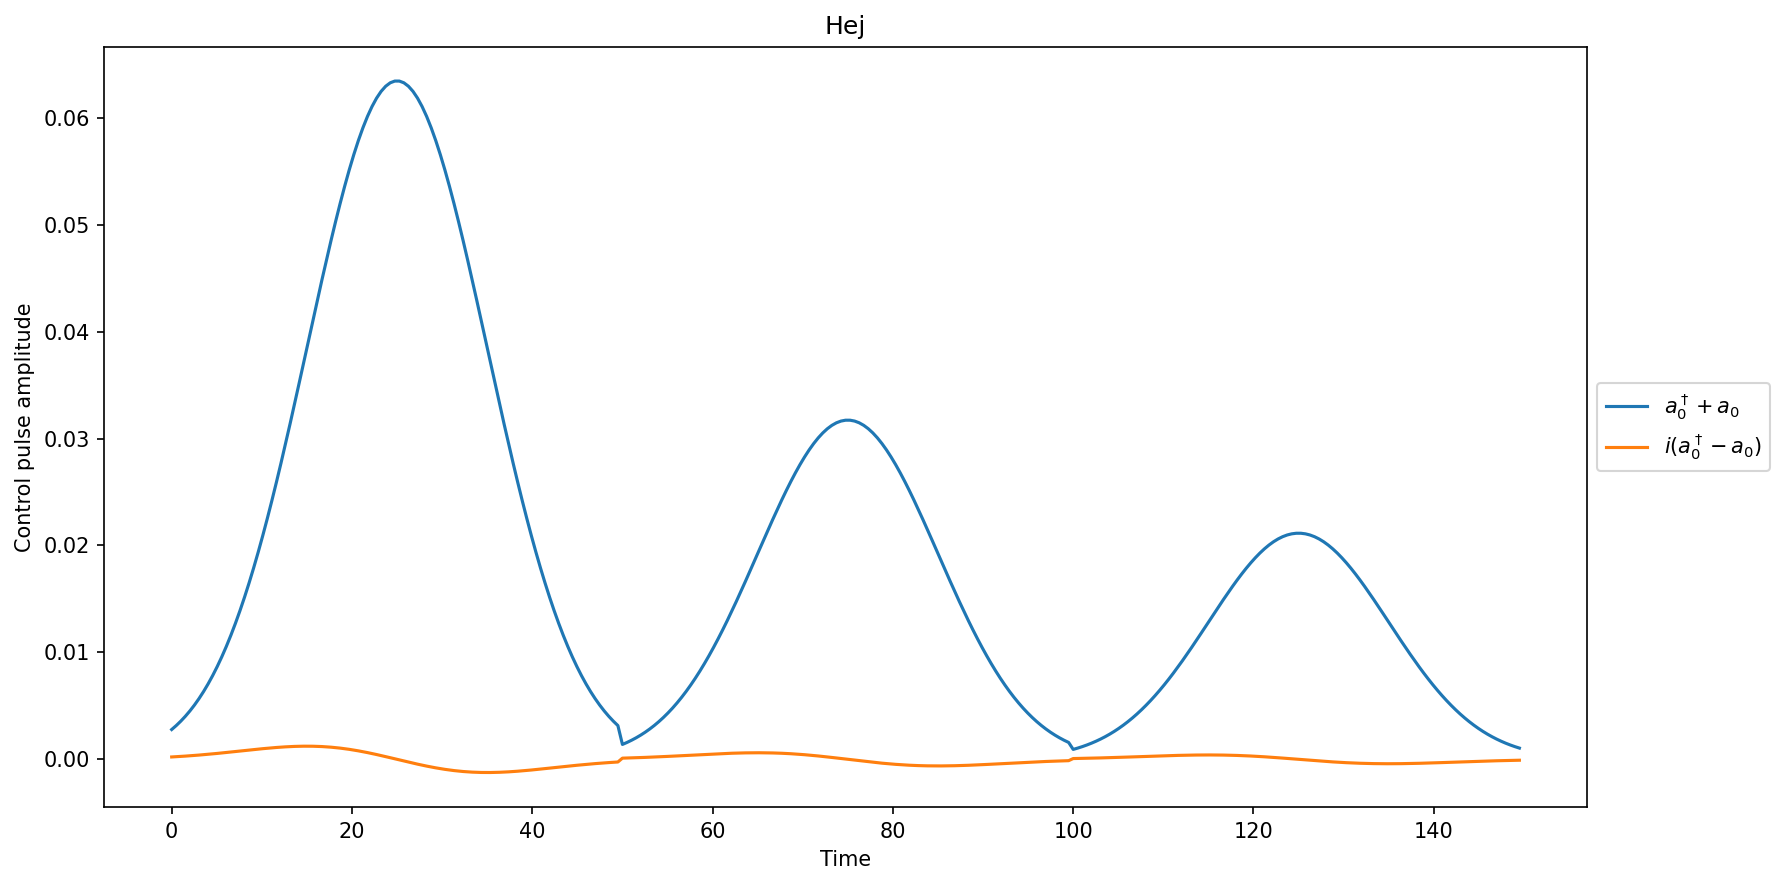

In [12]:
from qip.ethprocessor import ETHProcessor
import numpy as np
pi = np.pi

# Resonance frequency in GHz
omega = 5.708390 * 2*pi

# Self-Kerr coefficient (anharmonicity) in GHz
alpha = -0.275172227 * 2*pi

eth = ETHProcessor(N = 1, resonance_freq = omega, anharmonicity = alpha)

eth.load_circuit(qc);

eth.plot_pulses(title='Hej', dpi=150)

In [2]:
coeff_list = []

I = [1,2,3]
Q = [4,5,6]

R = np.vstack((I,Q))

if len(coeff_list) == 0:
    coeff_list.append(I)
    coeff_list.append(Q)
    coeff_list = np.vstack(coeff_list)
else:
    coeff_list = np.concatenate((coeff_list,R),axis=1) 

print(coeff_list)    
if len(coeff_list) == 0:
    coeff_list.append(I)
    coeff_list.append(Q)
    coeff_list = np.vstack(coeff_list)
else:
    coeff_list = np.concatenate((coeff_list,R),axis=1) 

print(coeff_list)
print(R)
if len(coeff_list) == 0:
    coeff_list.append(I)
    coeff_list.append(Q)
    coeff_list = np.vstack(coeff_list)
else:
    coeff_list = np.concatenate((coeff_list,R),axis=1) 
    
    

coeffs = np.vstack(coeff_list)

print(coeffs)

NameError: name 'np' is not defined

In [ ]:
a = np.array([[1,2],[3,4],[1,2],[3,4]])
print(a.reshape((2,4)))

In [ ]:
np.hstack(([1],[1,2],[3]))

In [ ]:
self_dt_list = []

t_list = np.linspace(0,1,5)

dt_list = t_list[1:] - t_list[:-1]

t_tot = np.sum(dt_list)

# First list
self_dt_list.extend(dt_list)

# Second list
self_dt_list.extend(dt_list)

print(self_dt_list)
print(len(self_dt_list))

In [ ]:
tlist = []

t = 0 # Start counting from zero
tlist.append(t)
print(tlist)
for i in range(len(self_dt_list)):
    t += self_dt_list[i]
    tlist.append(t)

print(tlist)

In [ ]:
import matplotlib.pyplot as plt
L = 90

a = 1
sigma = 1

# Pulse shape
def Phi(t):
    
    # Square pulse of length L and amplitude a centered at (b+L/2)
    A = a * (np.heaviside(t, 0) - np.heaviside(t - L, 0))

    # Gaussian with mean (b+L/2) and std sigma
    f = np.exp(-pow(t-(L/2),2)/(2*pow(sigma,2)))

    return np.convolve(f, A, mode = 'same') / np.sum(f)

tlist = np.linspace(0,L,100)
plt.plot(tlist,Phi(tlist))

In [ ]:
L = 9
a = 1
sigma = 1


In [ ]:
a = [4,5,6]
a.pop()
print(a)

In [ ]:
a = np.array([4,5,6])
a = np.delete(a, len(a)-1)
print(a)